<a href="https://colab.research.google.com/github/DraganD-Ukr/Deep-Learning-Regression-Project/blob/main/AdmissionsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
11/11 [==============================] - 1s 28ms/step - loss: 0.3223 - mae: 0.4437 - val_loss: 0.1403 - val_mae: 0.2958
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0749 - mae: 0.2136 - val_loss: 0.0456 - val_mae: 0.1829
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0354 - mae: 0.1522 - val_loss: 0.0229 - val_mae: 0.1232
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0236 - mae: 0.1231 - val_loss: 0.0152 - val_mae: 0.1002
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0173 - mae: 0.1053 - val_loss: 0.0120 - val_mae: 0.0907
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0125 - mae: 0.0907 - val_loss: 0.0108 - val_mae: 0.0858
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0104 - mae: 0.0827 - val_loss: 0.0088 - val_mae: 0.0754
Epoch 8/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0088 - mae: 0.0

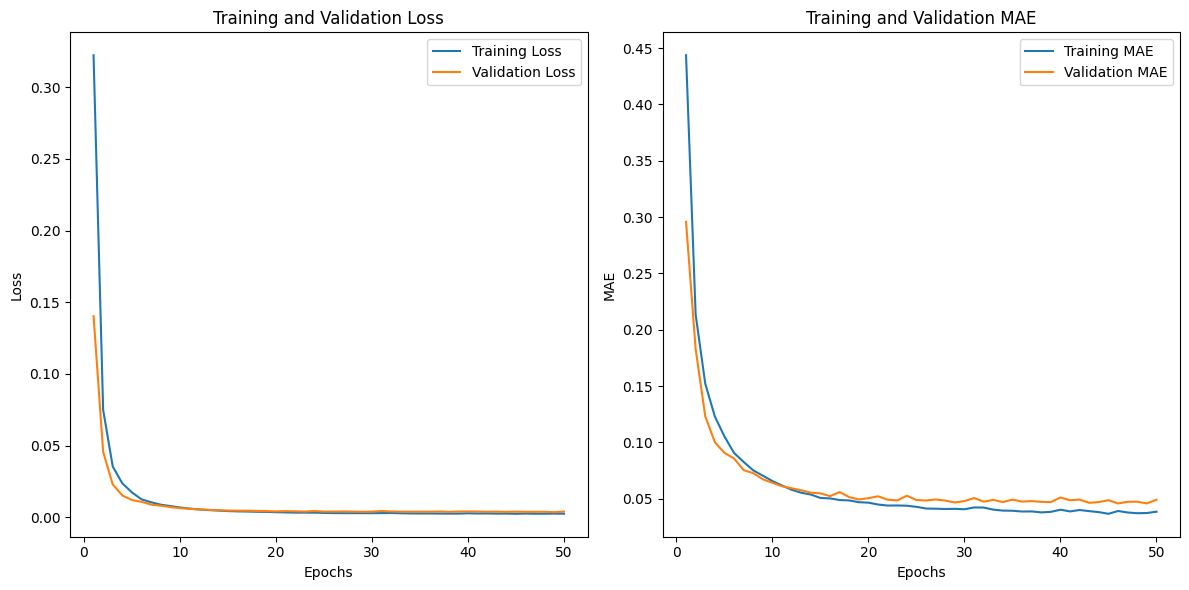

Test MSE: 0.0039774514734745026
Test MAE: 0.04917651042342186
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                256       
                                                                 
 dense_33 (Dense)            (None, 8)                 264       
                                                                 
 dense_34 (Dense)            (None, 1)                 9         
                                                                 
Total params: 529 (2.07 KB)
Trainable params: 529 (2.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

# Load your data
dataFrame = pd.read_csv('admissions_data.csv')

features = dataFrame.iloc[:, 0:7]
labels = dataFrame.iloc[:, -1]

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.3, random_state=42
)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

dataFrame_train = pd.DataFrame(features_train, columns=features.columns)
dataFrame_test = pd.DataFrame(features_test, columns=features.columns)

my_model = Sequential()
my_model.add(InputLayer(input_shape=(7,)))
my_model.add(Dense(32, activation='relu'))
my_model.add(Dense(8, activation='relu'))
my_model.add(Dense(1))

opt = Adam(learning_rate=0.01)
my_model.compile(loss='mse', metrics=['mae'], optimizer=opt)

# Specify a validation dataset
history = my_model.fit(
    features_train,
    labels_train,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=(features_test, labels_test)  # Add this line
)

# Access training metrics
train_loss = history.history['loss']
train_mae = history.history['mae']

# Access validation metrics
val_loss = history.history['val_loss']
val_mae = history.history['val_mae']

# Create plots for training and validation loss
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_mae) + 1), train_mae, label='Training MAE')
plt.plot(range(1, len(val_mae) + 1), val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test data
val_mse, val_mae = my_model.evaluate(features_test, labels_test, verbose=0)
print("Test MSE:", val_mse)
print("Test MAE:", val_mae)

my_model.summary()